In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy as sp
import h5py

import holodeck as holo
import holodeck.single_sources as ss
from holodeck.constants import YR, MSOL
from holodeck import utils, detstats, plot


import hasasia.sensitivity as hsen
import hasasia.sim as hsim

# Appendix: Regular Old Detection Statistic Calculation 
for 1 Parameter Space Sample, but many strain and sky realizations

### A.1 build sam and calculate gws

In [2]:
dur = 15.0*YR
cad = .2*YR
fobs = utils.nyquist_freqs(dur,cad)
fobs_edges = utils.nyquist_freqs_edges(dur,cad)
dfobs = np.diff(fobs_edges)
sam = holo.sam.Semi_Analytic_Model() 
# sam = holo.sam.Semi_Analytic_Model(mtot=(1.0e4*MSOL, 1.0e11*MSOL, 20), mrat=(1e-3, 1.0, 20), redz=(1e-3, 10.0, 20))  # faster version
hc_ss_one, hc_bg_one = sam.ss_gwb(fobs_edges, realize=20, loudest=5)

SS 1: 
Current memory usage: max=0.23 GB, RSS=0.23 GB, VMS=390.82 GB
10:26:58 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
10:26:58 INFO : Stalled SAM bins based on GMT: 2.58e+05/6.53e+05 = 3.96e-01 [sam.py:static_binary_density]
10:26:58 INFO : Adding MMbulge scatter (3.4000e-01) [sam.py:static_binary_density]
10:26:58 INFO : 	dens bef: (0.00e+00, 0.00e+00, 3.29e-61, 8.58e-04, 1.48e-02, 2.79e-02, 4.47e-02) [sam.py:static_binary_density]
10:27:14 INFO : Scatter added after 15.506534 sec [sam.py:static_binary_density]
10:27:14 INFO : 	dens aft: (6.72e-29, 2.61e-15, 3.78e-09, 1.03e-03, 1.50e-02, 2.80e-02, 4.26e-02) [sam.py:static_binary_density]
10:27:14 INFO : 	mass: 8.56e-02 ==> 8.54e-02 || change = -1.7939e-03 [sam.py:static_binary_density]
10:27:14 INFO : zeroing out 2.58e+05/6.53e+05 = 3.96e-01 systems stalled from GMT [sam.py:static_binary_density]
10:27:15 INFO : fraction of coalesced binaries: 3.28e+06/2.41e+07 = 1.36e-01 [sam.py:dynamic_binary_nu

### A.2 build pta

In [3]:
npsrs = 40
phis = np.random.uniform(0, 2*np.pi, size = npsrs)
thetas = np.random.uniform(np.pi/2, np.pi/2, size = npsrs)
sigmas = np.ones_like(phis)*5.2e-6
# build sim_pta
pulsars = hsim.sim_pta(timespan=dur/YR, cad=1/(cad/YR), sigma=sigmas,
                    phi=phis, theta=thetas)


### A.3 calculate bg DP

[0.38955329 0.39882982 0.42811102 0.39099756 0.42114946 0.3312818
 0.3651623  0.38722127 0.6688776  0.3719304  0.44395192 0.50501569
 0.40570496 0.42713767 0.42682766 0.44951179 0.32157365 0.44590855
 0.35086009 0.37087922]
[0.38955329 0.39882982 0.42811102 0.39099756 0.42114946 0.3312818
 0.3651623  0.38722127 0.6688776  0.3719304  0.44395192 0.50501569
 0.40570496 0.42713767 0.42682766 0.44951179 0.32157365 0.44590855
 0.35086009 0.37087922]


Text(0.5, 1.0, 'F,R,L =(37, 20, 5)\nsigmas=5.20e-06')

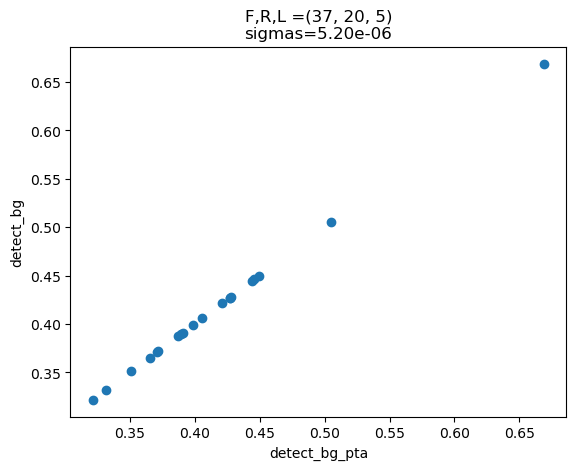

In [4]:
dp_bg1 = detstats.detect_bg_pta(pulsars, fobs, cad, hc_bg_one)
dp_bg2 = detstats.detect_bg(thetas, phis, sigmas, fobs, cad, hc_bg_one)
plt.scatter(dp_bg1, dp_bg2)
print(dp_bg1)
print(dp_bg2)
plt.xlabel('detect_bg_pta')
plt.ylabel('detect_bg')
plt.title(('F,R,L ='+ str(hc_ss_one.shape)+'\nsigmas=%.2e' %sigmas[0]))


### A.4 build ss sky realizations

In [5]:
print(hc_ss_one.shape)

(37, 20, 5)


In [6]:
S = 15
F = len(fobs)
L = len(hc_ss_one[0,0])
theta_ss = np.random.uniform(0, np.pi, size=F*S*L).reshape(F,S,L)
phi_ss = np.random.uniform(0,2*np.pi, size=theta_ss.size).reshape(theta_ss.shape)
Phi0_ss = np.random.uniform(0,2*np.pi, size=theta_ss.size).reshape(theta_ss.shape)
iota_ss = np.random.uniform(0, np.pi, size = theta_ss.size).reshape(theta_ss.shape)
psi_ss = np.random.uniform(0, np.pi, size = theta_ss.size).reshape(theta_ss.shape)

### A.5 calculate ss DP

In [7]:
dp_ss1 = detstats.detect_ss_pta(pulsars, cad, dur, fobs, dfobs, hc_ss_one, hc_bg_one,
                                theta_ss=theta_ss, phi_ss=phi_ss, Phi0_ss=Phi0_ss, iota_ss=iota_ss, psi_ss=psi_ss)
dp_ss2 = detstats.detect_ss(thetas, phis, sigmas, cad, dur, fobs, dfobs, hc_ss_one, hc_bg_one,
                                theta_ss=theta_ss, phi_ss=phi_ss, Phi0_ss=Phi0_ss, iota_ss=iota_ss, psi_ss=psi_ss)

(20, 15) 1.02e-03, 1.04e-03, 1.08e-03, 1.24e-03, 6.53e-03, 8.54e-02, 4.74e-01
(20, 15) 1.02e-03, 1.04e-03, 1.08e-03, 1.24e-03, 6.53e-03, 8.54e-02, 4.74e-01


Text(0.5, 1.0, 'F,R,L =(37, 20, 5)\nsigmas=5.20e-06')

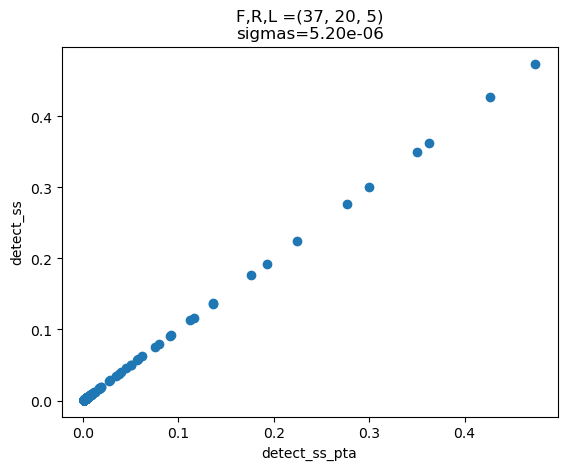

In [8]:
plt.scatter(dp_ss1, dp_ss2)
print(dp_ss1.shape, utils.stats(dp_ss1))
print(dp_ss2.shape, utils.stats(dp_ss2))
plt.xlabel('detect_ss_pta')
plt.ylabel('detect_ss')
plt.title(('F,R,L ='+ str(hc_ss_one.shape)+'\nsigmas=%.2e' %sigmas[0]))


In [9]:
print(dp_ss1.shape) # (R, S)

(20, 15)


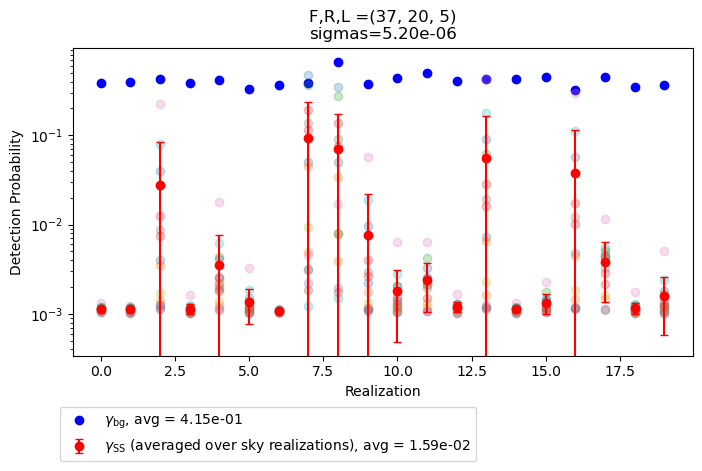

In [10]:
def plot_dpbg_dpss(dpbg, dpss, title):
    R = len(dpbg)
    fig, ax = plt.subplots(figsize = (8,4))
    ax.scatter(np.arange(R), dpbg, label='$\gamma_\mathrm{bg}$, avg = %.2e' % np.mean(dpbg), color='blue')
    ax.errorbar(np.arange(R), np.mean(dpss, axis=1), yerr=np.std(dpss, axis=1), capsize=3,
                linestyle='', marker='o',
                color='red', label = '$\gamma_\mathrm{SS}$ (averaged over sky realizations), avg = %.2e' 
                % np.mean(dpss))
    for ss in range(len(dpss[0])):
        ax.scatter(np.arange(R), dpss[:,ss], alpha=0.25)

    fig.legend(bbox_to_anchor=(0.1,0), bbox_transform=fig.transFigure, loc='upper left')
    ax.set_xlabel('Realization')
    ax.set_ylabel('Detection Probability')
    ax.set_yscale('log')
    ax.set_title(title)
    # plt.ylim(0,1)
    return fig

fig = plot_dpbg_dpss(dp_bg1, dp_ss1, title = ('F,R,L ='+ str(hc_ss_one.shape)+'\nsigmas=%.2e' %sigmas[0]))

### A.6 %timeit

In [11]:
%timeit detstats.detect_ss_pta(pulsars, cad, dur, fobs, dfobs, hc_ss_one, hc_bg_one,\
                                theta_ss=theta_ss, phi_ss=phi_ss, Phi0_ss=Phi0_ss, iota_ss=iota_ss, psi_ss=psi_ss) 

6.51 s ± 59.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
%timeit detstats.detect_ss(thetas, phis, sigmas, cad, dur, fobs, dfobs, hc_ss_one, hc_bg_one, \
                                theta_ss=theta_ss, phi_ss=phi_ss, Phi0_ss=Phi0_ss, iota_ss=iota_ss, psi_ss=psi_ss)

6.54 s ± 36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
%timeit detstats.detect_bg_pta(pulsars, fobs, cad, hc_bg_one)
%timeit detstats.detect_bg(thetas, phis, sigmas, fobs, cad, hc_bg_one)


21.3 ms ± 764 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
21.2 ms ± 718 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## A.7 Vary L
### L = 100

In [14]:
def calculate_dps(pulsars, hc_ss, hc_bg, S=15):
    F = len(hc_ss)
    R = len(hc_ss[0])
    L = len(hc_ss[0,0])

    # build ss sky realizations        
    theta_ss = np.random.uniform(0, np.pi, size=F*S*L).reshape(F,S,L)
    phi_ss = np.random.uniform(0,2*np.pi, size=theta_ss.size).reshape(theta_ss.shape)
    Phi0_ss = np.random.uniform(0,2*np.pi, size=theta_ss.size).reshape(theta_ss.shape)
    iota_ss = np.random.uniform(0, np.pi, size = theta_ss.size).reshape(theta_ss.shape)
    psi_ss = np.random.uniform(0, np.pi, size = theta_ss.size).reshape(theta_ss.shape)

    dp_bg = detstats.detect_bg_pta(pulsars, fobs, cad, hc_bg)
    dp_ss = detstats.detect_ss_pta(pulsars, cad, dur, fobs, dfobs, hc_ss, hc_bg,
                                theta_ss=theta_ss, phi_ss=phi_ss, Phi0_ss=Phi0_ss, 
                                iota_ss=iota_ss, psi_ss=psi_ss)
    return dp_bg, dp_ss 

def time_dps(pulsars, hc_ss, hc_bg, S=15):
    F = len(hc_ss)
    R = len(hc_ss[0])
    L = len(hc_ss[0,0])

    # build ss sky realizations        
    theta_ss = np.random.uniform(0, np.pi, size=F*S*L).reshape(F,S,L)
    phi_ss = np.random.uniform(0,2*np.pi, size=theta_ss.size).reshape(theta_ss.shape)
    Phi0_ss = np.random.uniform(0,2*np.pi, size=theta_ss.size).reshape(theta_ss.shape)
    iota_ss = np.random.uniform(0, np.pi, size = theta_ss.size).reshape(theta_ss.shape)
    psi_ss = np.random.uniform(0, np.pi, size = theta_ss.size).reshape(theta_ss.shape)

    %timeit detstats.detect_bg_pta(pulsars, fobs, cad, hc_bg)
    %timeit detstats.detect_ss_pta(pulsars, cad, dur, fobs, dfobs, hc_ss, hc_bg,\
                                theta_ss=theta_ss, phi_ss=phi_ss, Phi0_ss=Phi0_ss, \
                                iota_ss=iota_ss, psi_ss=psi_ss)


In [15]:
hc_ss_L100, hc_bg_L100 = sam.ss_gwb(fobs_edges, realize=20, loudest=100)
dp_bg_L100, dp_ss_L100 = calculate_dps(pulsars, hc_ss_L100, hc_bg_L100, S=15)

SS 1: 
Current memory usage: max=2.50 GB, RSS=1.20 GB, VMS=392.00 GB
10:29:38 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
10:29:39 INFO : fraction of coalesced binaries: 3.28e+06/2.41e+07 = 1.36e-01 [sam.py:dynamic_binary_number]
10:29:39 INFO : stalled binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
SS 2: 
Current memory usage: max=2.50 GB, RSS=0.62 GB, VMS=392.00 GB
SS 3: 
Current memory usage: max=2.50 GB, RSS=0.79 GB, VMS=392.17 GB
10:29:43 WARNING : Using `redz_prime` for redshift (includes galaxy merger time, but not evolution time) [sam.py:ss_gwb]
SS 4: 
Current memory usage: max=2.50 GB, RSS=1.33 GB, VMS=392.35 GB


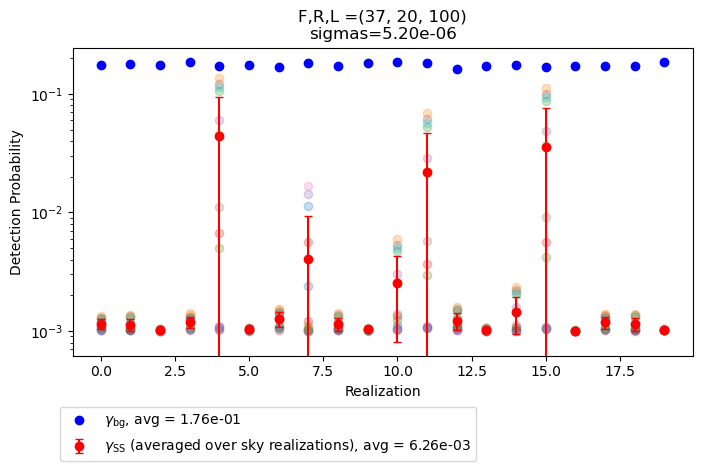

In [16]:
fig = plot_dpbg_dpss(dp_bg_L100, dp_ss_L100, 
                     title = ('F,R,L ='+ str(hc_ss_L100.shape)+'\nsigmas=%.2e' %sigmas[0]))

### L = 1

SS 1: 
Current memory usage: max=2.50 GB, RSS=1.11 GB, VMS=392.01 GB
10:32:07 INFO : zero_coalesced=True, zero_stalled=False [sam.py:dynamic_binary_number]
10:32:07 INFO : fraction of coalesced binaries: 3.28e+06/2.41e+07 = 1.36e-01 [sam.py:dynamic_binary_number]
10:32:07 INFO : stalled binaries are not being accounted for in `dynamic_binary_number`! [sam.py:dynamic_binary_number]
SS 2: 
Current memory usage: max=2.50 GB, RSS=0.82 GB, VMS=392.26 GB
SS 3: 
Current memory usage: max=2.50 GB, RSS=0.99 GB, VMS=392.43 GB
10:32:12 WARNING : Using `redz_prime` for redshift (includes galaxy merger time, but not evolution time) [sam.py:ss_gwb]
SS 4: 
Current memory usage: max=2.55 GB, RSS=1.49 GB, VMS=392.69 GB


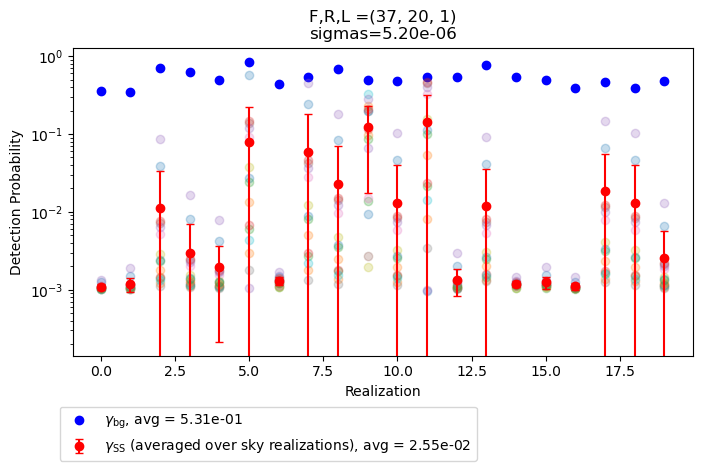

In [17]:
hc_ss_L1, hc_bg_L1 = sam.ss_gwb(fobs_edges, realize=20, loudest=1)
dp_bg_L1, dp_ss_L1 = calculate_dps(pulsars, hc_ss_L1, hc_bg_L1, S=15)
fig = plot_dpbg_dpss(dp_bg_L1, dp_ss_L1, 
                     title = ('F,R,L ='+ str(hc_ss_L1.shape)+'\nsigmas=%.2e' %sigmas[0]))

## A.8 % Timeit 

In [18]:
time_dps(pulsars, hc_ss_L1, hc_bg_L1, S=15)

21.3 ms ± 229 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.85 s ± 15.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
time_dps(pulsars, hc_ss_L100, hc_bg_L100, S=15)

20.7 ms ± 196 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2min 8s ± 861 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
